In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [338]:
#Sources of the data is from the Chinese government website https://data.stats.gov.cn/english/index.htm

def process_file(file_name):
    data = pd.read_csv(file_name, encoding = 'latin1', skiprows=2) #When the data is downloaded, the first 2 rows are simply the title of the data
    data = data.set_index('Indicators')
    data = data.head(data.shape[0]-1) #Removing the last row which just states the source
    data = data.fillna(0) #This may not be the best way to handle NaN value
    return data

In [339]:
number_of_files = 8
data = [None] * number_of_files
row_to_copy = [None] * number_of_files

In [340]:
data[0] = process_file('Monthly.csv') #Unemployment rate
data[1] = process_file('Monthly (1).csv') #Industrial value-add growth rate
data[2] = process_file('Monthly (2).csv') #Investment in fixed assets
data[3] = process_file('Monthly (3).csv') #Service projection
data[4] = process_file('Monthly (4).csv') #Real estate investment
data[5] = process_file('Monthly (5).csv') #Retail sales
data[6] = process_file('Monthly (6).csv') #Import and export
data[7] = process_file('Monthly (7).csv') #PMI

In [341]:
data[0].head()

,Jul 2023,Jun 2023,May 2023,Apr 2023,Mar 2023,Feb 2023,Jan 2023,Dec 2022,Nov 2022,Oct 2022,...,May 2021,Apr 2021,Mar 2021,Feb 2021,Jan 2021,Dec 2020,Nov 2020,Oct 2020,Sep 2020,Aug 2020
Indicators,,,,,,,,,,,,,,,,,,,,,
The Urban Surveyed Unemployment Rate(%),5.3,5.2,5.2,5.2,5.3,5.6,5.5,5.5,5.7,5.5,...,5.0,5.1,5.3,5.5,5.4,5.2,5.2,5.3,5.4,5.6
The Urban Surveyed Unemployment Rate of Population with Local Household Registration(%),5.3,5.1,5.1,5.1,5.1,5.4,5.4,5.4,5.5,5.4,...,5.1,5.1,5.3,5.7,5.6,0.0,0.0,0.0,0.0,0.0
The Urban Surveyed Unemployment Rate of Population with Non-local Household Registration(%),5.2,5.3,5.4,5.4,5.6,5.9,5.6,5.7,6.2,5.7,...,5.0,5.1,5.4,5.2,5.1,0.0,0.0,0.0,0.0,0.0
The Urban Surveyed Unemployment Rate of the Population Aged from 16 to 24(%),0.0,21.3,20.8,20.4,19.6,18.1,17.3,16.7,17.1,17.9,...,13.8,13.6,13.6,13.1,12.7,12.3,12.8,13.2,15.0,16.8
The Urban Surveyed Unemployment Rate of the Population Aged from 25 to 59(%),0.0,4.1,4.1,4.2,4.3,4.8,4.7,4.8,5.0,4.7,...,4.4,4.6,4.8,5.0,4.9,4.7,4.7,4.8,4.8,4.8


In [342]:
#Manually select the representative data for each category
row_to_copy[0] = ['The Urban Surveyed Unemployment Rate of the Population Aged from 16 to 24(%)',
              'The Urban Surveyed Unemployment Rate(%)']
row_to_copy[1] = ['Value-added of Industry Growth Rate (The same period last year=100)(%)']
row_to_copy[2] = ['Investment Actually Completed in Fixed Assets Accumulated Growth Rate(%)']
row_to_copy[3] = ['Index of Service Production(ISP) Growth Rate (The same period last year=100)(%)']
row_to_copy[4] = ['Investment of Real Estate  Accumulated Growth Rate(%)']
row_to_copy[5] = ['Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%)']
row_to_copy[6] = ['Total Value of Imports and Exports Growth Rate (The same period last year=100)(%)']
row_to_copy[7] = ['Comprehensive PMI output index(%)']

In [343]:
#Create a new DF with the selected parameters, plus the value we would like to estimate (youth employment)
new_data = pd.DataFrame(data=None, columns=data[0].columns)
for i in range(number_of_files):
    new_data = pd.concat([new_data, data[i].loc[row_to_copy[i]]], ignore_index=False)
new_data.head()

,Jul 2023,Jun 2023,May 2023,Apr 2023,Mar 2023,Feb 2023,Jan 2023,Dec 2022,Nov 2022,Oct 2022,...,May 2021,Apr 2021,Mar 2021,Feb 2021,Jan 2021,Dec 2020,Nov 2020,Oct 2020,Sep 2020,Aug 2020
The Urban Surveyed Unemployment Rate of the Population Aged from 16 to 24(%),0.0,21.3,20.8,20.4,19.6,18.1,17.3,16.7,17.1,17.9,...,13.8,13.6,13.6,13.1,12.7,12.3,12.8,13.2,15.0,16.8
The Urban Surveyed Unemployment Rate(%),5.3,5.2,5.2,5.2,5.3,5.6,5.5,5.5,5.7,5.5,...,5.0,5.1,5.3,5.5,5.4,5.2,5.2,5.3,5.4,5.6
Value-added of Industry Growth Rate (The same period last year=100)(%),3.7,4.4,3.5,5.6,3.9,0.0,0.0,1.3,2.2,5.0,...,8.8,9.8,14.1,0.0,0.0,7.3,7.0,6.9,6.9,5.6
Investment Actually Completed in Fixed Assets Accumulated Growth Rate(%),3.4,3.8,4.0,4.7,5.1,5.5,0.0,5.1,5.3,5.8,...,15.4,19.9,25.6,35.0,0.0,2.9,2.6,1.8,0.8,-0.3
Index of Service Production(ISP) Growth Rate (The same period last year=100)(%),5.7,6.8,11.7,13.5,9.2,0.0,0.0,-0.8,-1.9,0.1,...,12.5,18.2,25.3,0.0,0.0,7.7,8.0,7.4,5.4,4.0


In [344]:
#Extract the Jul 2023 data which we are interested to estimate
july_data = new_data["Jul 2023"]

In [345]:
new_data = new_data.drop(columns=["Jul 2023"])

In [346]:
y = new_data.loc['The Urban Surveyed Unemployment Rate of the Population Aged from 16 to 24(%)']
x = new_data.drop(index=['The Urban Surveyed Unemployment Rate of the Population Aged from 16 to 24(%)']).transpose()

In [347]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [348]:
reg.score(x, y)

0.7102197716374612

In [349]:
reg.coef_

array([-0.01174289, -0.16967361,  0.23157234,  0.08439041, -0.25397055,
        0.01035226, -0.03049408,  0.12243401])

In [350]:
reg.intercept_

9.754272832010912

In [351]:
print("est. Jul 2023 youth unemployment rate:")
print(round(sum(reg.coef_*july_data[1:])+reg.intercept_, 1))

est. Jul 2023 youth unemployment rate:
18.8


In [352]:
est = {}
act = {}
for d in new_data.columns:
    est[d] = round(sum(reg.coef_*new_data[d][1:])+reg.intercept_, 1)
    act[d] = new_data[d][0]

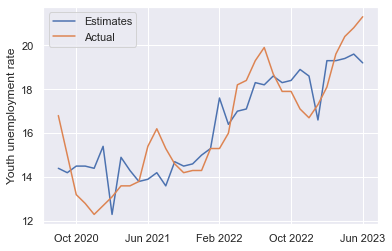

In [353]:
plt.plot(list(est.keys()), est.values(), label="Estimates")
plt.plot(act.values(), label="Actual")

plt.legend()

plt.ylabel('Youth unemployment rate')

plt.gca().invert_xaxis()

ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::8])

plt.show()